In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Importing the Dataset

In [2]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Exploratory data analysis (EDA)

In [3]:
# Checking for unique entries of column
print(f"The types of Fuel are : {df['Fuel_Type'].unique()}")
print(f"The types of Selling are : {df['Selling_type'].unique()}")
print(f"The types of Transmission are : {df['Transmission'].unique()}")
print(f"The types of Onwer are : {df['Owner'].unique()}")

The types of Fuel are : ['Petrol' 'Diesel' 'CNG']
The types of Selling are : ['Dealer' 'Individual']
The types of Transmission are : ['Manual' 'Automatic']
The types of Onwer are : [0 1 3]


In [4]:
# Checking for missing value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
# Checking for duplicate value
df.duplicated().any()

True

In [6]:
# droping the duplicate value
df = df.drop_duplicates().reset_index(drop = True)

In [7]:
# Infomation about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.1+ KB


In [8]:
df[['Selling_Price', 'Present_Price', 'Driven_kms']].describe()

,Selling_Price,Present_Price,Driven_kms
count,299.000000,299.000000,299.000000
mean,4.589632,7.541037,36916.752508
std,4.984240,8.566332,39015.170352
min,0.100000,0.320000,500.000000
25%,0.850000,1.200000,15000.000000
50%,3.510000,6.100000,32000.000000
75%,6.000000,9.840000,48883.500000
max,35.000000,92.600000,500000.000000


In [9]:
df['Car_Name'].value_counts().apply(lambda x : ((x/len(df['Car_Name']))*100)).round(2)

city                        8.70
corolla altis               5.35
verna                       4.68
brio                        3.34
fortuner                    3.34
                            ... 
Honda CB Trigger            0.33
Yamaha FZ S                 0.33
Bajaj Pulsar 135 LS         0.33
Activa 4g                   0.33
Bajaj Avenger Street 220    0.33
Name: Car_Name, Length: 98, dtype: float64

26% of the cars are distributed in five cars (city, corolla altis, verna and fortuner and brio).

In [10]:
df['Fuel_Type'].value_counts().apply(lambda x : ((x/len(df['Fuel_Type']))*100)).round(2)

Petrol    79.93
Diesel    19.40
CNG        0.67
Name: Fuel_Type, dtype: float64

Almost 80% cars moved by Petrol.

In [11]:
df['Selling_type'].value_counts().apply(lambda x : ((x/len(df['Selling_type']))*100)).round(2)

Dealer        64.55
Individual    35.45
Name: Selling_type, dtype: float64

Almost 65% of the cars you have to deal directly with Dealers.

In [12]:
df['Transmission'].value_counts().apply(lambda x : ((x/len(df['Transmission']))*100)).round(2)

Manual       86.96
Automatic    13.04
Name: Transmission, dtype: float64

Almost 87% of the cars are Manual.

In [13]:
df['Owner'].value_counts().apply(lambda x : ((x/len(df['Owner']))*100)).round(2)

0    96.32
1     3.34
3     0.33
Name: Owner, dtype: float64

96% of the car has no. of owner 0.

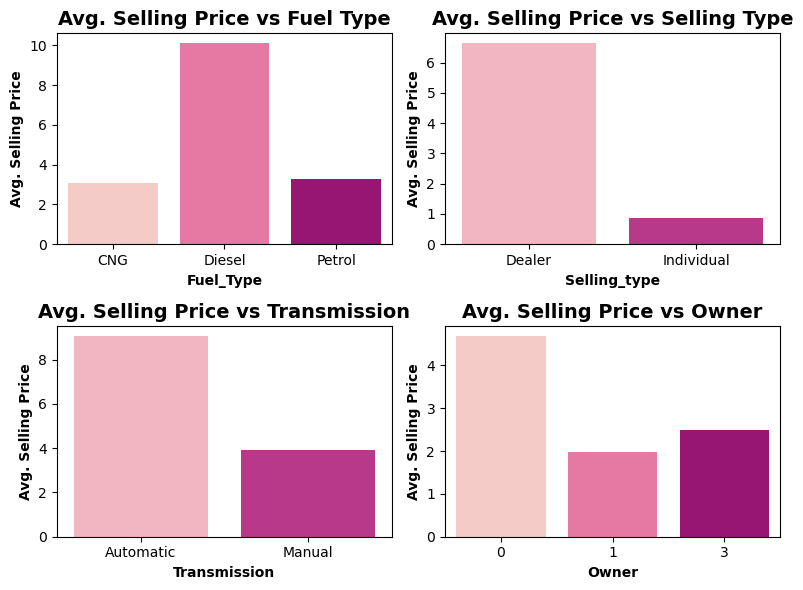

In [14]:
def plot_group(df, group_column, title, plot_number):
    group = df.groupby(group_column).mean().reset_index()

    plt.subplot(2, 2, plot_number)
    sns.barplot(data=group, x=group_column, y='Selling_Price', palette='RdPu')

    plt.xlabel(group_column, fontweight='bold')
    plt.ylabel('Avg. Selling Price', fontweight='bold')
    plt.title(f'Avg. Selling Price vs {title}', fontsize=14, fontweight='bold')

# Create a 2x2 subplot grid
plt.figure(figsize=(8, 6))

plot_group(df, 'Fuel_Type', 'Fuel Type', 1)
plot_group(df, 'Selling_type', 'Selling Type', 2)
plot_group(df, 'Transmission', 'Transmission', 3)
plot_group(df, 'Owner', 'Owner', 4)

plt.tight_layout()  
plt.show()


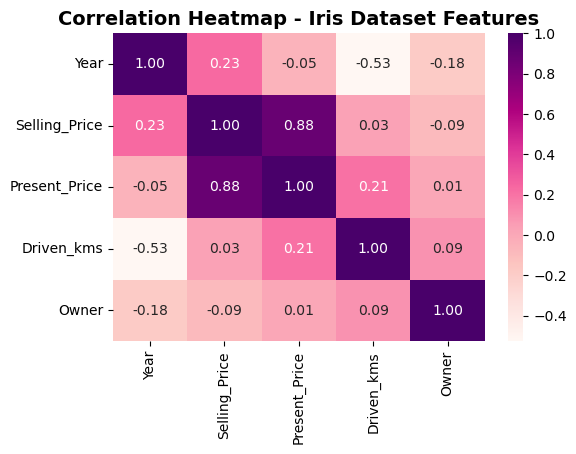

In [15]:
# Calculatation of correlation matrix
correlation_matrix = df.corr()

# The heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt=".2f")
plt.title('Correlation Heatmap - Iris Dataset Features', fontsize = 14, fontweight = 'bold')
plt.show()

In [16]:
# Correlation of the data set wrt target variable
correlation_matrix['Selling_Price']

Year             0.234369
Selling_Price    1.000000
Present_Price    0.876305
Driven_kms       0.028566
Owner           -0.087880
Name: Selling_Price, dtype: float64

## Checking for Outliers

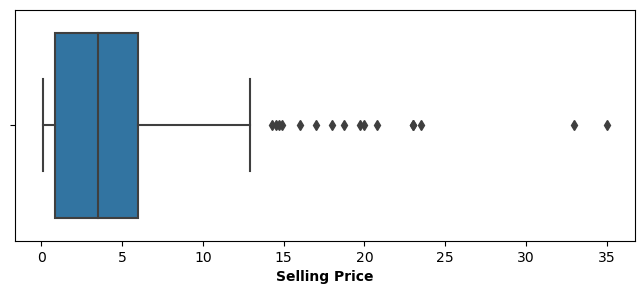

In [17]:
# Checking for outlier in target variable
plt.figure(figsize = (8,3))
sns.boxplot(x = df['Selling_Price'])
plt.xlabel('Selling Price', fontweight = 'bold')
plt.show()

In [18]:
# Row Indices of the outliers
print(np.where(df['Selling_Price'] > 12.5)[0]) 

[ 49  50  51  52  58  61  62  63  65  68  78  79  81  85  94  95 248]


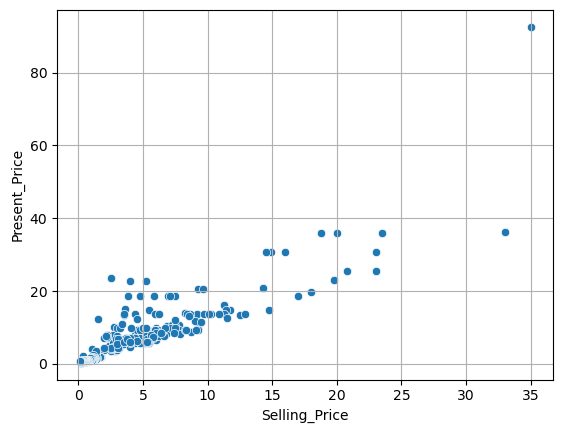

In [19]:
# Checking for outliers wrt the highest correlation of independent variable 
sns.scatterplot(y = df['Present_Price'], x = df['Selling_Price']) # Selling Price and the present price has the highest correlation
plt.grid()
plt.show()

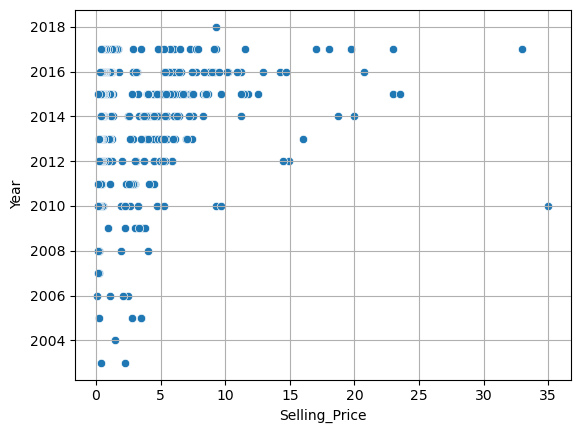

In [20]:
# Scatter plot between Selling Price vs Year to checking the outliers
sns.scatterplot(y = df['Year'], x = df['Selling_Price']) 
plt.grid()
plt.show()

So, we can conclude that our dataset has outliers for Selling Price greater than 12.5

## Removing Outliers

In [21]:
Q1 = df['Selling_Price'].quantile(0.25)
Q3 = df['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(f"IQR : {IQR}")
print(f"Lower : {lower : .2f}")
print(f"Upper : {upper : .2f}")

# Creating arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Selling_Price'] >= upper)[0]
lower_array = np.where(df['Selling_Price'] <= lower)[0]

IQR : 5.15
Lower : -6.88
Upper :  13.73


In [22]:
# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

In [23]:
df.reset_index(drop=True)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
278,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
279,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
280,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
281,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Division of Independet Vatriable and Target Variable 

In [24]:
X = df.drop(['Car_Name', 'Selling_Price'],  axis=1).values
y = df['Selling_Price'].values

## Encoding categorical data

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4,5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [26]:
X[0]

array([0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2014, 5.59, 27000, 0],
      dtype=object)

## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## Training the Multiple Linear Regression model on the Training set

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
# Dataframe of Predicted and Actual value of dependent variable of test set
pred_data = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
pred_data.columns = ['Y Test Predictions', 'Y Test Actual']
pred_data.head()

,Y Test Predictions,Y Test Actual
0,0.920651,0.65
1,4.750045,3.95
2,1.635951,1.20
3,4.674845,4.50
4,7.044619,10.90


## R squared Error & Mean Squared Error Calculation


In [32]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X_test)
print(f"r2 score : {metrics.r2_score(y_test, y_pred) : .2f}")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred) : .2f}')

r2 score :  0.84
Mean Squared Error:  1.96


## Training the model on the Training set Using XGBOOST

In [33]:
from xgboost import XGBRegressor
r = XGBRegressor()
r.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Predicting the Test set results

In [34]:
# Dataframe of Predicted and Actual value of dependent variable of test set
pred_data = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
pred_data.columns = ['Y Test Predictions', 'Y Test Actual']
pred_data.head()

,Y Test Predictions,Y Test Actual
0,0.920651,0.65
1,4.750045,3.95
2,1.635951,1.20
3,4.674845,4.50
4,7.044619,10.90


# R squared Error & Mean Squared Error Calculation

In [35]:
y_pred = r.predict(X_test)
print(f"r2 score : {metrics.r2_score(y_test, y_pred) : .2f}")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred) : .2f}')

r2 score :  0.94
Mean Squared Error:  0.74
